In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Load Titanic dataset
data = sns.load_dataset('titanic')

# Display the first few rows of the dataset
data.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
# Drop rows with missing 'age' values
data_cleaned = data.dropna(subset=['age'])

# Display the dataset after cleaning
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     714 non-null    int64   
 1   pclass       714 non-null    int64   
 2   sex          714 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        714 non-null    int64   
 5   parch        714 non-null    int64   
 6   fare         714 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        714 non-null    category
 9   who          714 non-null    object  
 10  adult_male   714 non-null    bool    
 11  deck         184 non-null    category
 12  embark_town  712 non-null    object  
 13  alive        714 non-null    object  
 14  alone        714 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 70.2+ KB


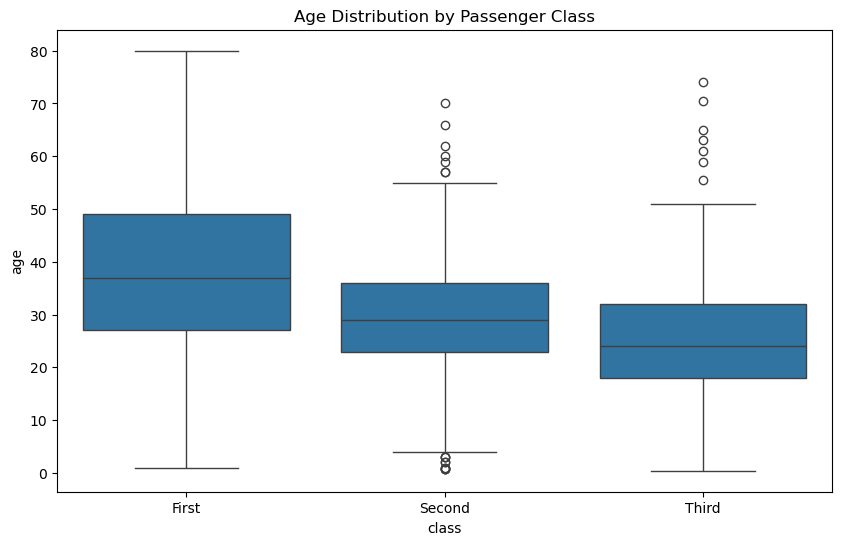

In [3]:
# Boxplot to visualize the distribution of age across different classes
plt.figure(figsize=(10,6))
sns.boxplot(x='class', y='age', data=data_cleaned)
plt.title('Age Distribution by Passenger Class')
plt.show()


In [4]:
# Extract age data for passengers in different classes
class1 = data_cleaned[data_cleaned['class'] == 'First']['age']
class2 = data_cleaned[data_cleaned['class'] == 'Second']['age']
class3 = data_cleaned[data_cleaned['class'] == 'Third']['age']

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(class1, class2, class3)

# Output the F-statistic and p-value
f_stat, p_value

(57.443484340676214, 7.487984171959904e-24)

In [5]:
# Significance level (alpha)
alpha = 0.05

# Interpretation of ANOVA result
if p_value < alpha:
    print(f"The p-value ({p_value}) is less than the significance level ({alpha}).")
    print("We reject the null hypothesis. There is a significant difference in average age across the classes.")
else:
    print(f"The p-value ({p_value}) is greater than the significance level ({alpha}).")
    print("We fail to reject the null hypothesis. There is no significant difference in average age across the classes.")

The p-value (7.487984171959904e-24) is less than the significance level (0.05).
We reject the null hypothesis. There is a significant difference in average age across the classes.
